**Multiarmed Bandits: epsilon-Greedy versus Greedy algorithms**

In this notebook, we implement epsilon-Greedy and Greedy algorithms in Julia

Let's import needed packages

In [2]:
using Distributions
using Plots
using ProgressMeter
using Random

Create the bandit environment equivalent to gym-bandits

In [3]:
Random.seed!(42)
# Simple bandit environment for 10-armed Gaussian bandit
mutable struct BanditTenArmedGaussian
    means::Vector{Float64}
    
    function BanditTenArmedGaussian()
        # Sample true action values from Normal(0, 1)
        means = randn(10)
        new(means)
    end
end

function step!(env::BanditTenArmedGaussian, action::Int)
    # Return reward from Normal(true_mean, 1)
    reward = randn() + env.means[action]
    return 0, reward, true, Dict()
end

function reset!(env::BanditTenArmedGaussian)
    return 0
end

env = BanditTenArmedGaussian()

BanditTenArmedGaussian([-0.36335748145177754, 0.2517372155742292, -0.31498797116895605, -0.31125240132442067, 0.8163067649323273, 0.47673837983187795, -0.8595553820616212, -1.4692882055065464, -0.20661311448119266, -0.31074387308373413])

Define the epsilon-Greedy actions (Note: if epsilon=0 it corresponds to the Greedy action)

In [4]:
function get_action(Q, e)
    if rand() < e
        return rand(1:10)  # Julia uses 1-based indexing
    else
        return argmax(Q)
    end
end

get_action (generic function with 1 method)

We want to compare the Average Reward over repeated experiments for different values of epsilon.

We define a function that compute the average of obtained reward over repeated experiments.

In [5]:
function average(tot_rewards)
    avg = Float64[]
    for i in 1:length(tot_rewards[1])
        temp = 0.0
        for j in 1:length(tot_rewards)
            temp += tot_rewards[j][i]
        end
        temp /= length(tot_rewards)
        push!(avg, temp)
    end
    return avg
end

average (generic function with 1 method)

Main code: define an Environment for 10-armed Bandit whose rewards are normal distributed with standard deviation = 1 and a mean drawn from a normal distribution (0,1). Same as Sutton&Barto book

In [6]:
k = 10  # Number of actions (arms)
iter = 1000 # Number of steps
repeat = 2000 # Number of repetitions
e0 = Float64[]  # Results for Greedy algorithm (epsilon=0)
e001 = Float64[] # Results for epsilon = 0.01
e01 = Float64[] # Results for epsilon = 0.1
e02 = Float64[] # Results for epsilon = 0.2

# Environment is already created above

Float64[]

Run the Greedy algorithm (epsilon = 0) several times to average the results

In [7]:
# set seed
reset!(env)
tot_rewards = []
e = 0
@showprogress for _ in 1:repeat
    Q = zeros(Float64, k)
    N = zeros(Int, k)
    rewards = Float64[]
    for i in 1:iter
        action = get_action(Q, e)
        state, reward, done, info = step!(env, action)
        push!(rewards, reward)
        N[action] += 1
        Q[action] = Q[action] + 1/N[action] * (reward - Q[action])
    end
    reset!(env)
    push!(tot_rewards, rewards)
end

e0 = average(tot_rewards)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


1000-element Vector{Float64}:
 -0.3553112571598675
  0.011903799250345543
 -0.026316748509990426
 -0.03820877773930687
  0.025458734197433847
  0.07938530098755311
  0.2083255057912391
  0.1960921508687731
  0.32206129105003467
  0.25164695072962195
  0.2851567592100674
  0.27902732264027297
  0.33940540632346605
  ⋮
  0.567148721817349
  0.5711555676240828
  0.587676029412696
  0.5447010167369074
  0.5421166428194766
  0.5794931741799685
  0.5812904142559521
  0.5432838346672542
  0.5757294582050293
  0.5730082394854494
  0.5611908130607665
  0.5630130144408118

Run the epsilon-Greedy algorithm with epsilon = 0.01 several times to average the results

In [8]:
# set seed
Random.seed!(42)

reset!(env)
tot_rewards = []
e = 0.01
@showprogress for _ in 1:repeat
    Q = zeros(Float64, k)
    N = zeros(Int, k)
    rewards = Float64[]
    for i in 1:iter
        action = get_action(Q, e)
        state, reward, done, info = step!(env, action)
        push!(rewards, reward)
        N[action] += 1
        Q[action] = Q[action] + 1/N[action] * (reward - Q[action])
    end
    reset!(env)
    push!(tot_rewards, rewards)
end

e001 = average(tot_rewards)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


1000-element Vector{Float64}:
 -0.3621926818985585
  0.033008234070944595
 -0.01715391115045331
 -0.012473132077793788
  0.0031135802585863835
  0.11644081126981437
  0.1651373902999929
  0.20652792693095046
  0.2665675599221718
  0.27720790021615616
  0.29423605931718055
  0.3648252665957491
  0.33853687090776047
  ⋮
  0.6251093579948037
  0.6403661569198009
  0.6463876280277125
  0.6454004388792726
  0.6880191318985062
  0.6358855632835185
  0.6740592181537557
  0.6447217058854345
  0.6721881786251322
  0.6752363349932865
  0.642526091041134
  0.7006567973105882

Run the epsilon-Greedy algorithm with epsilon = 0.1 several times to average the results

In [9]:
# set seed
Random.seed!(42)

reset!(env)
tot_rewards = []
e = 0.1
@showprogress for _ in 1:repeat
    Q = zeros(Float64, k)
    N = zeros(Int, k)
    rewards = Float64[]
    for i in 1:iter
        action = get_action(Q, e)
        state, reward, done, info = step!(env, action)
        push!(rewards, reward)
        N[action] += 1
        Q[action] = Q[action] + 1/N[action] * (reward - Q[action])
    end
    reset!(env)
    push!(tot_rewards, rewards)
end

e01 = average(tot_rewards)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


1000-element Vector{Float64}:
 -0.33429640159505386
 -0.008777918089236702
 -0.032938456725698645
 -0.02177536269293476
 -0.010937728716571811
  0.0772173277721062
  0.14685069935990686
  0.15883966384707013
  0.2249976211771523
  0.21413042038216246
  0.26280767525937204
  0.25297366609061284
  0.3019400082022333
  ⋮
  0.6903013617587592
  0.697355906718576
  0.6683831833112146
  0.7075413798735557
  0.7263427340763204
  0.7133726056116109
  0.6900080591866238
  0.6561780140320645
  0.7187566049029176
  0.6753445168366199
  0.6610358604432138
  0.7259289656017056

Run the epsilon-Greedy algorithm with epsilon = 0.2 several times to average the results

In [10]:
# set seed
Random.seed!(42)

reset!(env)
tot_rewards = []
e = 0.2
@showprogress for _ in 1:repeat
    Q = zeros(Float64, k)
    N = zeros(Int, k)
    rewards = Float64[]
    for i in 1:iter
        action = get_action(Q, e)
        state, reward, done, info = step!(env, action)
        push!(rewards, reward)
        N[action] += 1
        Q[action] = Q[action] + 1/N[action] * (reward - Q[action])
    end
    reset!(env)
    push!(tot_rewards, rewards)
end

e02 = average(tot_rewards)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


1000-element Vector{Float64}:
 -0.34639845921053875
 -0.0393886946260256
 -0.07555571599561686
 -0.056373392282215495
 -0.017592252303860346
  0.006416605085453088
  0.08029898793698055
  0.08759518761558976
  0.12768058281391137
  0.204122767196742
  0.21635716590102494
  0.2487387141556191
  0.22451942644142753
  ⋮
  0.6261127798376483
  0.5950850220876319
  0.5740497781960155
  0.5692848483427936
  0.6155130482984355
  0.5772672303650599
  0.6135792861068188
  0.5431946835984811
  0.5762514924668999
  0.6081906402714256
  0.5945947796550288
  0.5707960214418276

Finally, we plot the results to compare the Greedy algorithm against the epsilon-Greedy algorithm

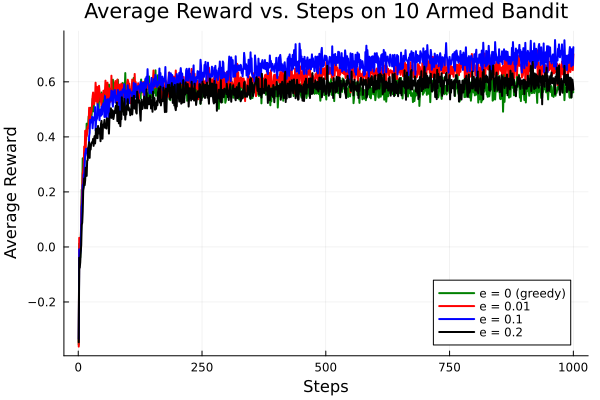

In [14]:
# reset plot
plot()
plot!(e0, color=:green, label="e = 0 (greedy)", linewidth=2)
plot!(e001, color=:red, label="e = 0.01", linewidth=2)
plot!(e01, color=:blue, label="e = 0.1", linewidth=2)
plot!(e02, color=:black, label="e = 0.2", linewidth=2)
xlabel!("Steps")
ylabel!("Average Reward")
title!("Average Reward vs. Steps on 10 Armed Bandit")
current()